In [1]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np        
from gensim.models import Doc2Vec as GensimDoc2Vec
import os
import matplotlib.pyplot as plt
import random

c:\Users\Jacopo\Documents\Projects\ml-search-engine\preprocessing\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Jacopo\Documents\Projects\ml-search-engine\preprocessing\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


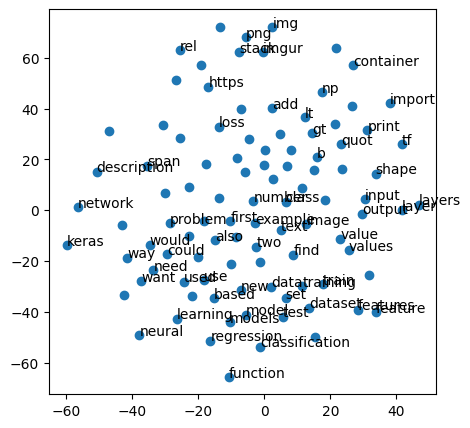

In [3]:
num_dimensions = 2  # final num dimensions (2D, 3D, etc)

model = GensimDoc2Vec.load('../models/stored_models/datascience_word2vec_gensim.model')
# extract the words & their vectors, as numpy arrays
vectors = np.asarray(model.wv.vectors[:100])
labels = np.asarray(model.wv.index_to_key[:100])  # fixed-width numpy strings


# reduce using t-SNE
tsne = TSNE(n_components=num_dimensions, random_state=0)
vectors = tsne.fit_transform(vectors)

x_vals = [v[0] for v in vectors]
y_vals = [v[1] for v in vectors]

plt.figure(figsize=(5, 5))
plt.scatter(x_vals, y_vals)

 #
# Label randomly subsampled 25 data points
#
indices = list(range(len(labels)))
selected_indices = random.sample(indices, 70)
for i in selected_indices:
    if (str(labels[i]) not in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'e']):
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))
        
